# Análise Exploratória de Dados

<div><h2>Visão Geral</h2></div>

O objetivo deste notebook é realizar a análise exploratória do conjunto de dados `Tips`. O estudo divide-se em três seções:
* Descrição dos dados
* Perguntas de partida e hipóteses
* Insights dos dados analisados

Para a realização da análise estatística e visualização dos dados foram utilizadas as seguintes bibliotecas do Python: *Pandas*, *Numpy*, *Matplotlib* e *Seaborn*. 

* Base de dados: https://github.com/atlantico-academy/datasets/blob/main/tips.csv
* Informações sobre o conjunto de dados: https://rdrr.io/cran/reshape2/man/tips.html 

---

<div><h2>Sumário</h2></div>

1. [Descrição dos dados](#descricao_dados)<br>
1.1. [Leitura do Conjunto de dados](#leitura_dados)<br>
1.2. [Dicionário de dados](#dicionario_dados)<br>
1.3. [Dados faltantes ou nulos](#dados_nulos)<br>
1.4. [Conjunto de dados](#conjunto_dados)<br>
1.5. [Distribuição de dados](#distribuicao_dados)<br>
2. [Perguntas de partida e hipóteses](#perguntas)<br>
3. [Insights](#insights)<br>
3.1. [Há alguma correlação entre a gorjeta e o valor total da conta?](#pergunta_01)<br>
3.2. [Os dias da semana influenciam no valor da conta e da gorjeta?](#pergunta_02)<br>
3.3. [O gênero do cliente influencia no valor da gorjeta?](#pergunta_03)<br>
3.4. [Existem diferenças de valores de gorjetas entre fumantes e não fumantes?](#pergunta_04)<br>
3.5. [O horário das refeições influencia no valor das gorjetas? Se sim, qual o horário mais frequente?](#pergunta_05)<br>
3.6. [Qual a correlação entre a gorjeta e as demais variáveis quantitativas?](#pergunta_06)<br>
3.7. [Qual a influência da quantidade de pessoas na mesa no total da conta e valor da gorjeta? Qual a distribuição ao longo dos dias da semana?](#pergunta_07)<br>
3.8. [Principais Insights](#principais_insights)<br>


---

<div id='descricao'><h2>1. Descrição dos dados</h2></div>

<center>
    <img src="https://tinyurl.com/53xfysx9" width="400px">
</center>

`Tips` é um conjunto de dados com informações sobre gorjetas recebidas por um garçom durante um intervalo de dois meses e meio na década de 1990, enquanto trabalhava em um restaurante norte-americano. No conjunto de dados, foram registradas informações sobre o total da conta, gorjetas recebidas, gênero dos clientes, presença de fumantes ou não fumantes na mesa, dias da semana em que foram recebidas gorjetas, período do dia em que as refeições ocorreram e a quantidade de pessoas na mesa.

Ao todo, foram registradas **244 gorjetas**. Tais dados foram publicados em uma coleção de estudos de caso sobre estatísticas de negócio no livro *_Practical Data Analysis: Case Studies in Business Statistics (2005)_*, pelos autores Peter G. Bryant e Marlene A. Smith.

---

<div id='leitura_dados'><h3>1.1. Leitura do conjunto de dados</h3></div> 

Primeiramente, foi realizada a importação das bibliotecas a serem utilizadas na análise e visualização de dados, a paleta de cores padrão e a leitura do conjunto de dados.

In [1]:
#Imports
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [60]:
#Definindo a paleta de cores
colors = ["#43BD68", "#6F60BD", "#49A5BD", "#BD4342"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [3]:
#Apresentando o conjunto de dados
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<div id='dicionario_dados'><h3>1.2. Dicionário de dados</h3></div> 

Elaborou-se um dicionário de dados contendo o nome da variável, breve descrição, o tipo da variável (quantitativo ou qualitativo) e seus respectivos subtipos (nominal, ordinal, contínua ou discreta).

In [4]:
#Apresentando o dicionário de dados
dictionary = pd.read_csv('../data/external/dictionary.csv')
dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Total da conta em dólares,quantitativa,contínua
1,tip,Gorjeta recebida em dólares,quantitativa,contínua
2,sex,Gênero dos clientes,qualitativa,nominal
3,smoker,Presença de fumantes na mesa,qualitativa,nominal
4,day,Dia da semana em que a gorjeta foi recebida,qualitativa,ordinal
5,time,Período em que as refeições ocorreram,qualitativa,nominal
6,size,Quantidade de pessoas na mesa,quantitativa,discreta


O dataframe possui 7 variáveis, sendo elas classificadas como:
* 2 quantitativas contínuas 
* 1 quantitativa discreta
* 3 qualitativas nominais
* 1 qualitativa ordinal
---

<div id='dados_nulos'><h3>1.3. Dados faltantes ou nulos</h3></div> 

Existem valores faltantes ou nulos `(NaN)` no conjunto de dados?

In [90]:
# Analisando os valores faltantes ou nulos nas variáveis
number_of_nan_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_nan_rows = df.isnull().any(axis=1).sum()

if number_of_nan_rows == 0:
    print("O conjunto não possui dados faltantes.") 
else: 
    print(f"O conjunto possui {number_of_nan_rows} linhas com dados faltantes.")

display(number_of_nan_by_column)

O conjunto não possui dados faltantes.


Series([], dtype: int64)

<div id='conjunto_dados'><h3>1.4. Conjunto de dados</h3></div>

In [6]:
display(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [92]:
# Criando dicionário para armazenar as variáveis, tipos de dados e seus valores únicos
uniques = {'Variavel': [], 'Tipo': [], 'Valores': []}

for variable in dictionary['variavel']:
    if variable in df.columns:
        uniques['Variavel'].append(variable)
        uniques['Tipo'].append(df[variable].dtype)
        uniques['Valores'].append(set(df[variable].unique()))
    else:
        uniques['Variavel'].append(variable)
        uniques['Tipo'].append(None)
        uniques['Valores'].append(set())

df_uniques = pd.DataFrame.from_dict(uniques)
display(HTML(df_uniques.to_html()))

,Variavel,Tipo,Valores
0,total_bill,float64,"{3.07, 5.75, 7.25, 8.77, 9.55, 10.34, 10.27, 10.33, 13.37, 14.78, 15.04, 16.99, 15.42, 18.43, 14.83, 16.29, 21.01, 21.58, 23.68, 24.59, 25.29, 26.41, 26.86, 26.88, 20.65, 21.7, 24.06, 31.27, 30.4, 32.4, 28.55, 35.26, 34.81, 38.01, 39.42, 32.68, 34.83, 40.17, 38.07, 44.3, 41.19, 9.68, 16.82, 48.27, 48.17, 50.81, 10.29, 10.07, 45.35, 16.58, 48.33, 11.61, 12.54, 12.46, 12.43, 17.82, 13.39, 13.0, 14.0, 14.07, 15.36, 16.97, 16.93, 16.04, 16.32, 16.0, 17.92, 17.78, 17.46, 17.07, 17.29, 18.35, 18.29, 18.04, 18.28, 17.47, 19.82, 19.65, 19.08, 18.64, 18.15, 20.29, 20.08, 20.92, 20.9, 20.53, 21.5, 22.75, 22.42, 22.82, 22.67, 23.33, 23.17, 23.1, 24.71, 24.08, 18.78, 25.28, 25.21, 25.71, ...}"
1,tip,float64,"{1.01, 1.66, 3.31, 3.61, 3.5, 4.71, 2.0, 3.12, 1.96, 3.23, 5.0, 4.08, 2.75, 7.58, 2.5, 3.0, 3.25, 3.75, 10.0, 4.0, 1.68, 4.5, 5.07, 6.0, 1.5, 1.0, 1.25, 6.5, 1.75, 2.18, 2.61, 9.0, 3.18, 3.11, 3.68, 1.36, 1.61, 2.54, 4.29, 1.97, 1.47, 2.47, 2.72, 3.15, 3.4, 1.83, 1.58, 2.01, 2.83, 3.51, 3.76, 3.08, 1.76, 5.15, 5.65, 1.44, 2.05, 2.55, 2.3, 3.55, 4.3, 1.8, 4.19, 1.98, 1.48, 1.73, 2.23, 3.48, 2.34, 2.09, 3.16, 3.41, 3.09, 4.34, 4.73, 5.16, 6.73, 2.52, 2.02, 3.02, 3.27, 1.45, 1.63, 2.45, 2.2, 2.88, 4.06, 4.2, 5.2, 6.7, 1.56, 2.31, 2.56, 3.06, 1.67, 1.92, 1.17, 2.24, 2.92, 2.74, ...}"
2,sex,object,"{Female, Male}"
3,smoker,object,"{Yes, No}"
4,day,category,"{Fri, Sat, Sun, Thur}"
5,time,object,"{Dinner, Lunch}"
6,size,int64,"{1, 2, 3, 4, 5, 6}"


* O conjunto de dados possui **244 linhas** e **7 colunas**; 
* As variáveis `total_bill` e `tip` são do tipo **float**;
* A variável `sex` é do tipo **string** e possui dois valores: **masculino (male)** ou **feminino (female)**; 
* A variável `smoker` é do tipo **string** e possui dois valores: **sim (Yes)** ou **Não (No)**;
* A variável `day` é do tipo **string** e possui valores de dias da semana de **quinta (Thursday)** à **domingo (Sunday)**;
* A variável `time` é do tipo **string** e possui dois valores dos períodos das refeições: **almoço (lunch)** ou **jantar (dinner)**;
* A variável `size` é do tipo **integer** e representa a quantidade de pessoas na mesa, contendo número inteiros de **1 a 6**.
---

<div id='distribuicao_dados'><h3>1.5. Distribuição dos dados</h3></div>

In [8]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


* Na variável `total_bill`, o valor máximo da conta é **50,81 dólares** e o mínimo **3,07 dólares**, sendo que **75%** das contas são abaixo de **25 dólares**. Observa-se também um alto desvio padrão indicando a presença de valores discrepantes (outliers) nessa variável;
* Na variável `tip`, o valor máximo da gorjeta é **10 dólares** e o mínimo **1 dólar**, com uma média de **2,99 dólares**;
* Na variável `sex`, o sexo mais frequente é o **masculino (male)**;
* na variável `smoker`, observa-se que mais da metade dos clientes **não são fumantes**;
* Em `day`, foram registrados no conjunto de dados somente quatro dias da semana (quinta, sexta, sábado e domingo), sendo **sábado o dia mais frequente**;
* O período de refeição `time` possui maior frequência no **jantar (dinner)**;
* Na variável `size`, têm-se que **75% das mesas** são ocupadas por grupos de até **3 pessoas**.
---

#### Distribuição das variáveis quantitativas

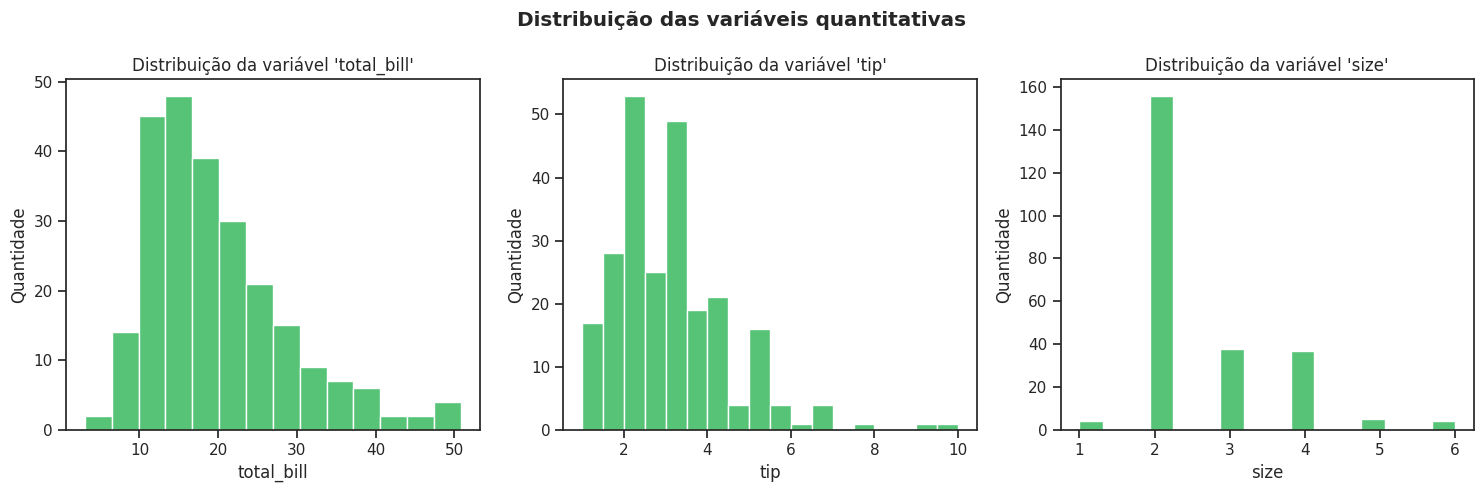

In [61]:
# Criando gráficos de barras de dados quantitativos
quantitative_columns = dictionary.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Distribuição das variáveis quantitativas', fontweight='bold')

for i, column in enumerate(quantitative_columns):
    sns.histplot(data=df, x=column, ax=axes[i], color=colors[0], alpha=0.9)       
    axes[i].set_title(f"Distribuição da variável '{column}'")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

* O valor total da conta varia predominantemente entre **10 e 20 dólares**;
* O valor da gorjeta varia na faixa de **2 e 4 dólares**, tendo menor frequência em valores acima de **4 dólares**;
* A quantidade de clientes mais usual são **2 pessoas**, seguidas de 3 e 4 pessoas.
---

#### Distribuição das variáveis qualitativas

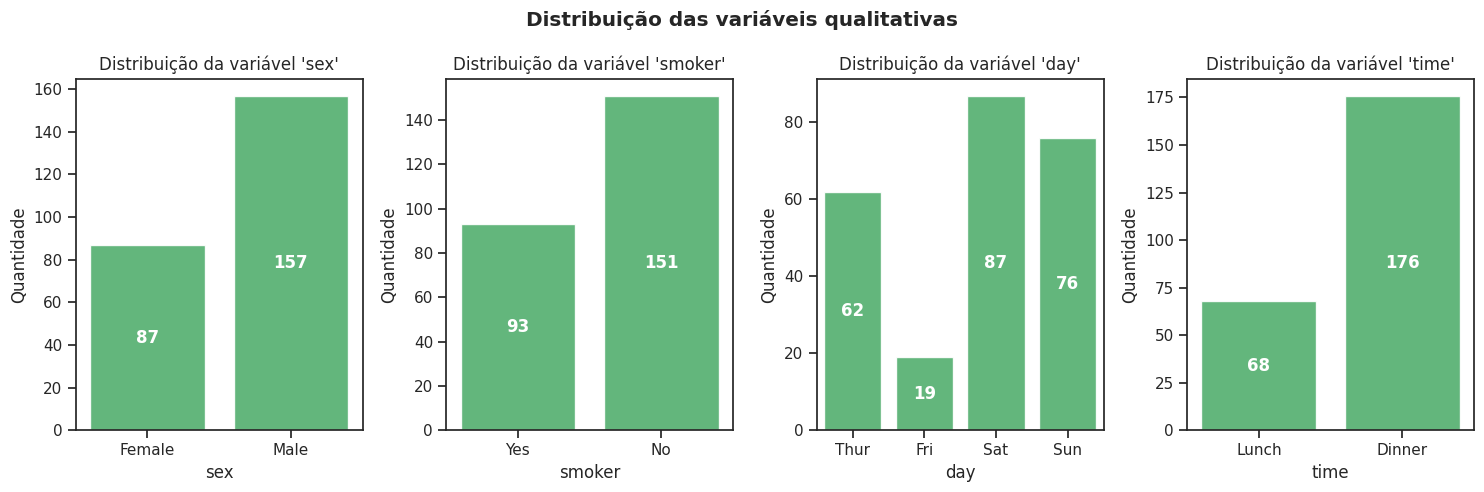

In [62]:
# Criando gráficos de barras de dados qualitativos (categóricos)
qualitative_columns = dictionary.query("tipo == 'qualitativa'").variavel.to_list()
days_order = ['Thur', 'Fri', 'Sat', 'Sun']
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

fig, axes = plt.subplots(1, len(qualitative_columns), figsize=(15, 5))  
fig.suptitle('Distribuição das variáveis qualitativas', fontweight='bold')

for i, column in enumerate(qualitative_columns):
    if column == 'day':
        ordered_counts = df[column].value_counts().reindex(days_order)
    else:
        ordered_counts = df[column].value_counts().sort_values()
    
    ax = sns.countplot(data=df, x=column, order=ordered_counts.index, ax=axes[i], color=colors[0], alpha=0.9)    
    ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white', weight='bold') 
    ax.set_title(f"Distribuição da variável '{column}'")
    ax.set_xlabel(column)
    ax.set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

* A maioria dos clientes são do sexo masculino (male), ao todo são **157 clientes**;
* O maior percentual de clientes é formado por **não fumantes**, ao todo são **151 clientes**;
* A distribuição do dia permite observar que o maior consumo é realizado no fim de semana (sábado e domingo), principalmente no **sábado**, e o menor na **sexta-feira**;
* O período de refeições mais usual é o **jantar (dinner)**.
---

<div id='perguntas'><h2>2. Perguntas de partida e hipóteses</h2></div>

* Há alguma correlação entre a gorjeta e o valor total da conta?
>***Hipótese:*** *É possível que haja uma correlação entre a gorjeta e o valor total da conta, ou seja, quanto maior a conta, maior tende a ser a gorjeta.*

* Os dias da semana influenciam no valor da conta e da gorjeta?
>***Hipótese:*** *Os valores médios da conta e da gorjeta podem variar dependendo do dia da semana. Pode ser que os valores sejam mais altos em determinados dias.*

* O gênero do cliente influencia no valor da gorjeta?
>***Hipótese:*** *Clientes dos sexos masculinos e femininos podem deixar gorjetas de valores diferentes.*

* Existem diferenças de valores de gorjetas entre fumantes e não fumantes?
>***Hipótese:*** *Fumantes e não fumantes podem deixar gorjetas de valores diferentes.*

* O horário das refeições influencia no valor das gorjetas? Se sim, qual o horário mais frequente?
>***Hipótese:*** *A distribuição das gorjetas pode variar dependendo se a refeição é feita no almoço ou jantar.*

* Qual a correlação entre a gorjeta e as demais variáveis quantitativas?
>***Hipótese:*** *Para além do valor total da conta, é possível que haja uma correlação entre a gorjeta e as demais variáveis quantitativas.*

* Qual a influência da quantidade de pessoas na mesa no total da conta e valor da gorjeta? Qual a distribuição ao longo dos dias da semana?
>***Hipótese:*** *O valor da conta pode aumentar dependendo do tamanho do grupo. Grupos maiores tendem a gastar mais, principalmente nos fins de semana.*

Com base nessas perguntas e hipóteses, o estudo será dividido em três seções, tendo como elemento de comparação a variável alvo `Tips`. São elas: 
* Análise da correlação entre o valor da gorjeta e o total da conta, tal como a relação com os dias da semana; 
* Análise do valor médio das gorjetas por dados qualitativos, como gênero, fumantes ou não fumantes e horário das refeições;
* Análise da correlação entre a gorjeta e as demais variáveis quantitativas.

---

<div id='insights'><h2>3. Insights</h2></div>

<div id='pergunta_01'><h3>3.1. Há alguma correlação entre a gorjeta e o valor total da conta?</h3></div>

>***Hipótese:*** *É possível que haja uma correlação entre a gorjeta e o valor total da conta, ou seja, quanto maior a conta, maior tende a ser a gorjeta.*

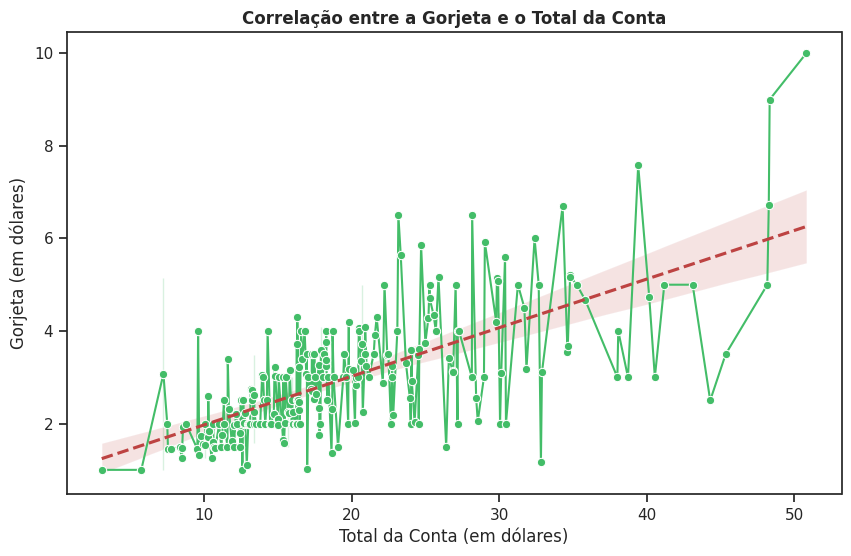

In [159]:
# Criando o gráfico de linha com linha de regressão das variáveis 'tip' e 'total_bill'
df_sorted = df.sort_values(by='total_bill')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='total_bill', y='tip', marker='o', color=colors[0])
sns.regplot(data=df_sorted, x='total_bill', y='tip', scatter=False, color=colors[3], line_kws={'linestyle': '--'})

plt.title('Correlação entre a Gorjeta e o Total da Conta', weight='bold')
plt.xlabel('Total da Conta (em dólares)')
plt.ylabel('Gorjeta (em dólares)')
plt.show()

In [12]:
# Calculando IQR para 'total_bill'
Q1_total_bill = df['total_bill'].quantile(0.25)
Q3_total_bill = df['total_bill'].quantile(0.75)
IQR_total_bill = Q3_total_bill - Q1_total_bill

lower_bound_total_bill = Q1_total_bill - 1.5 * IQR_total_bill
upper_bound_total_bill = Q3_total_bill + 1.5 * IQR_total_bill

outliers_total_bill = df[(df['total_bill'] < lower_bound_total_bill) | (df['total_bill'] > upper_bound_total_bill)]

print("Outliers em 'total_bill':")
print(outliers_total_bill)

Outliers em 'total_bill':
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4


In [13]:
# Calculando IQR para 'tip'
Q1_tip = df['tip'].quantile(0.25)
Q3_tip = df['tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip

lower_bound_tip = Q1_tip - 1.5 * IQR_tip
upper_bound_tip = Q3_tip + 1.5 * IQR_tip

outliers_tip = df[(df['tip'] < lower_bound_tip) | (df['tip'] > upper_bound_tip)]

print("Outliers em 'tip':")
print(outliers_tip)

Outliers em 'tip':
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


* Há uma alta correlação positiva entre a gorjeta e o valor total da conta, com uma maior concentração entre **10 e 30 dólares**;
* Com base no Intervalo Interquantil (IQR), verificou-se a presença de **9 valores discrepantes (outliers)** em ambas as variáveis `total_bill` e `tip`;

---
Para uma melhor compreensão da relação entre o total da conta e o valor da gorjeta, foi criada uma nova coluna, nomeada taxa de gorjeta ou `tip_rate_(%)`, resultado da divisão do valor da gorjeta pelo valor total da conta, tendo seus valores representados em formato percentual para melhor visualização.

In [14]:
# Calculando a taxa de gorjeta (tip_rate) em valor percentual e arredondado
df['tip_rate_(%)'] = (df['tip']/df['total_bill'])*100
print(df.round(2))

     total_bill   tip     sex smoker   day    time  size  tip_rate_(%)
0         16.99  1.01  Female     No   Sun  Dinner     2          5.94
1         10.34  1.66    Male     No   Sun  Dinner     3         16.05
2         21.01  3.50    Male     No   Sun  Dinner     3         16.66
3         23.68  3.31    Male     No   Sun  Dinner     2         13.98
4         24.59  3.61  Female     No   Sun  Dinner     4         14.68
..          ...   ...     ...    ...   ...     ...   ...           ...
239       29.03  5.92    Male     No   Sat  Dinner     3         20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2          7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2          8.82
242       17.82  1.75    Male     No   Sat  Dinner     2          9.82
243       18.78  3.00  Female     No  Thur  Dinner     2         15.97

[244 rows x 8 columns]


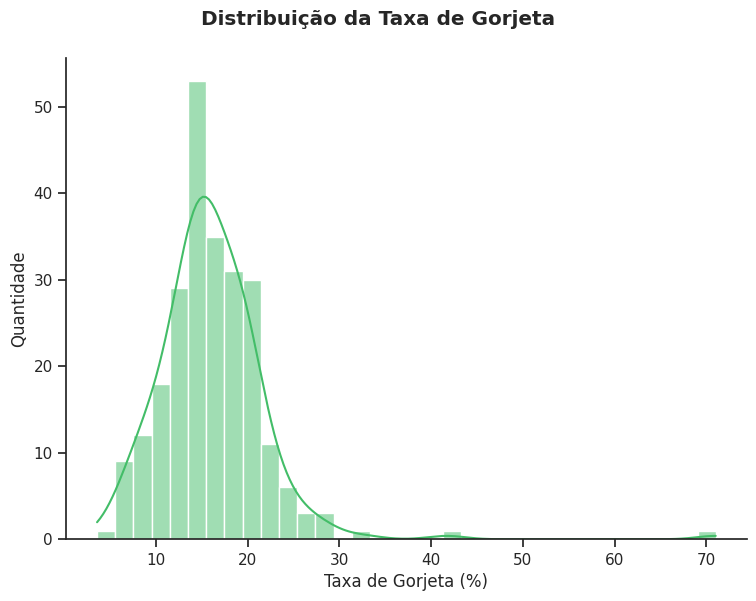

In [147]:
# Criando o histograma da variável tip_rate_(%) com KDE
with warnings.catch_warnings():
    warnings.simplefilter("ignore")    
    g = sns.displot(df['tip_rate_(%)'], kde=True, height=6, aspect=1.25, color=colors[0])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(top=0.9)  
    g.set_axis_labels("Taxa de Gorjeta (%)", "Quantidade")
    g.fig.suptitle('Distribuição da Taxa de Gorjeta', weight='bold')
plt.show()

In [97]:
# Distribuição dos dados da variável 'tip_rate(%)'
df['tip_rate_(%)'].describe().round(2)

count    244.00
mean      16.08
std        6.11
min        3.56
25%       12.91
50%       15.48
75%       19.15
max       71.03
Name: tip_rate_(%), dtype: float64

In [72]:
# Calculando IQR para 'tip_rate_(%)'
Q1_tip_rate = df['tip_rate_(%)'].quantile(0.25)
Q3_tip_rate = df['tip_rate_(%)'].quantile(0.75)
IQR_tip_rate = Q3_tip_rate - Q1_tip_rate

lower_bound_tip_rate = Q1_tip_rate - 1.5 * IQR_tip_rate
upper_bound_tip_rate = Q3_tip_rate + 1.5 * IQR_tip_rate

outliers_tip_rate = df[(df['tip_rate_(%)'] < lower_bound_tip_rate) | (df['tip_rate_(%)'] > upper_bound_tip_rate)]

print("Outliers em 'tip_rate_(%)': \n")
print(outliers_tip_rate.round(2))

Outliers em 'tip_rate_(%)': 

     total_bill   tip     sex smoker  day    time  size  tip_rate_(%)
67         3.07  1.00  Female    Yes  Sat  Dinner     1         32.57
172        7.25  5.15    Male    Yes  Sun  Dinner     2         71.03
178        9.60  4.00  Female    Yes  Sun  Dinner     2         41.67
232       11.61  3.39    Male     No  Sat  Dinner     2         29.20


* Conforme observado nos dados e gráfico acima, a taxa da gorjeta representa uma média de **16%** do valor total da conta, sendo que em **75%** dos valores registrados, a taxa da gorjeta representa **19,15%**;
* A variável taxa de gorjeta ou `tip_rate_(%)`, de acordo com o cálculo do Intervalo Interquantil (IQR), apresenta quatro valores divergentes (outliers), tendo uma gorjeta máxima de **5.15 dólares** ou **71,03%** do valor total da conta, superior ao valor médio de gorjeta de **2.99 dólares**; e um valor mínimo de **1.00 dólar** ou **3.07%** do valor total da conta;
* Existe uma alta correlação entre as variáveis `tip` e `total_bill`, concentrada num intervalo entre **10 e 30 dólares**, com o surgimento de outliers a medida que o valor da conta aumenta. 
---

<div id='pergunta_02'><h3>3.2. Os dias da semana influenciam no valor da conta e da gorjeta?</h3></div>

>***Hipótese:*** *Os valores médios da conta e da gorjeta podem variar dependendo do dia da semana. Pode ser que os valores sejam mais altos em determinados dias.*

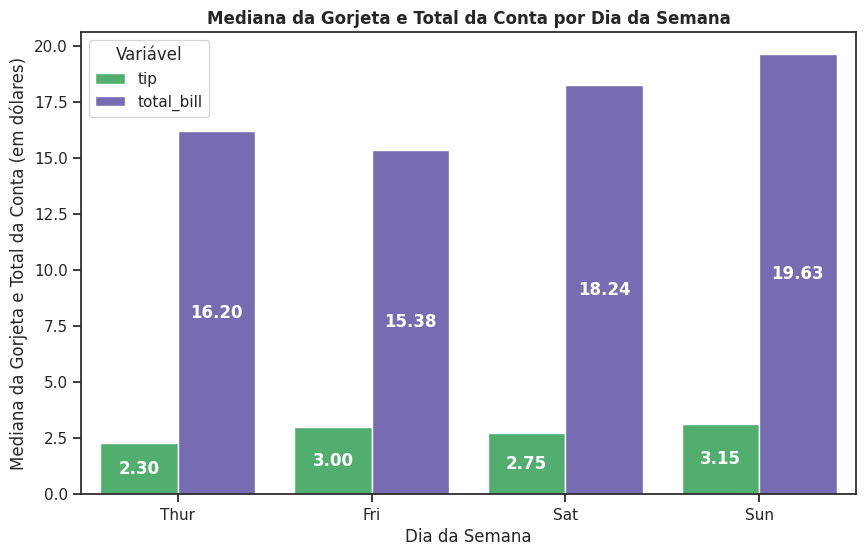

In [148]:
# Criando um gráfico de barras para comparar a mediana das variáveis 'total_bill' e 'tip' por 'day'
median_values = df.groupby('day').agg({'tip': 'median', 'total_bill': 'median'}).reset_index()
median_values_long = pd.melt(median_values, id_vars='day', var_name='variable', value_name='median_value')
ordered_days = ['Thur', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=median_values_long, x='day', y='median_value', hue='variable', order=ordered_days)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', weight='bold')
    
plt.title('Mediana da Gorjeta e Total da Conta por Dia da Semana', weight='bold')
plt.xlabel('Dia da Semana')
plt.ylabel('Mediana da Gorjeta e Total da Conta (em dólares)')
plt.legend(title='Variável')
plt.show()

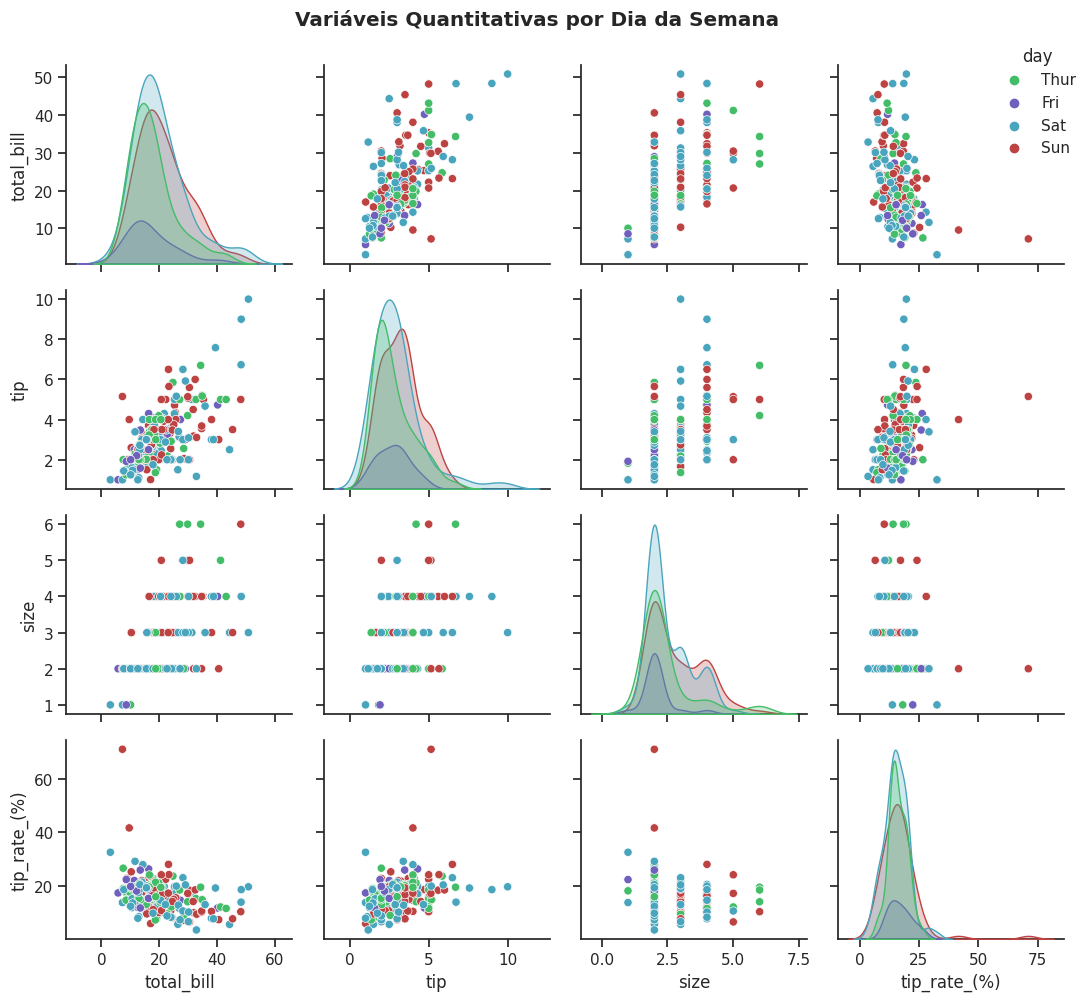

In [121]:
# Criando histograma e gráficos de dispersão das variáveis quantitativas por 'day'
df['day'] = pd.Categorical(df['day'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")    
    g = sns.pairplot(df, hue='day', height=2.5, palette=colors)    
    g._legend.set_bbox_to_anchor((1, 0.9))    
    plt.suptitle('Variáveis Quantitativas por Dia da Semana', y=1, weight='bold')
    plt.tight_layout()

plt.show()

* O valor das gorjetas têm pouca variação ao longo dos dias registrados, com um sutil aumento no fim de semana, entre **sexta (Friday)** e **domingo (Sunday)**;
* O valor total da conta tende a ser mais acentuado no fim de semana, principalmente entre **sábado (Saturday)** e **domingo (Sunday)**;
* Analisando a dispersão dos dados entre a gorjeta e o total da conta pelos dias da semana, é possível observar que os valores discrepantes tendem a se concentrar no sábado e domingo;
* A taxa de gorjeta `tip_rate_(%)` concentra-se em cerca de **20%**, ou seja, em média **1/5** do valor total da conta representa o valor da gorjeta. 
---

<div id='pergunta_03'><h3>3.3. O gênero do cliente influencia no valor da gorjeta?</h3></div>

>***Hipótese:*** *Clientes dos sexos masculinos e femininos podem deixar gorjetas de valores diferentes.*

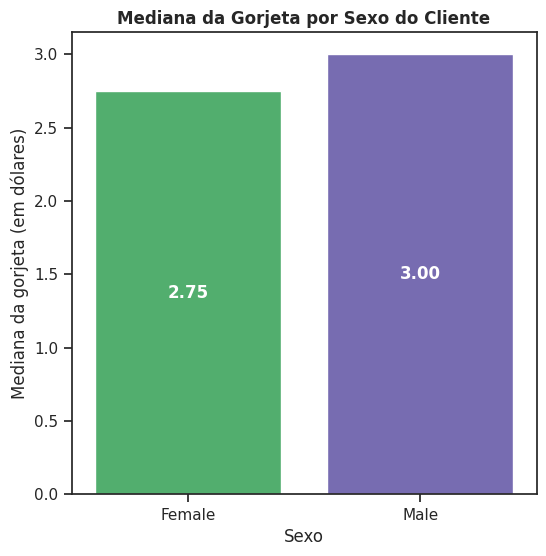

In [149]:
# Calculando a mediana da variável 'tip' por 'sex'
median_tips_by_sex = df.groupby('sex')['tip'].median().sort_values()

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=median_tips_by_sex.index, y=median_tips_by_sex.values, palette=colors)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center', color='white', weight='bold')

plt.title('Mediana da Gorjeta por Sexo do Cliente', weight='bold')
plt.xlabel('Sexo')
plt.ylabel('Mediana da gorjeta (em dólares)')
plt.show()

In [96]:
# Calculando o percentual de gorjetas recebidas por clientes do sexo feminino em relação ao masculino
male_to_female_percentage = ((median_tips_by_sex['Male'] / median_tips_by_sex['Female']*100)-100)

display(Markdown(
    "<br>"
   f"Os clientes do sexo masculino pagam `{male_to_female_percentage:.2f}%` "
    "de gorjeta a mais que clientes do sexo feminino."    
))

<br>Os clientes do sexo masculino pagam `9.09%` de gorjeta a mais que clientes do sexo feminino.

* O valor da gorjeta paga por clientes do sexo masculino é cerca de **9.09%** acima do valor pago por clientes do sexo feminino;
* Apesar do valor da gorjeta recebida por clientes masculinos ser sutilmente maior, se comparado às clientes do sexo feminino, não chega a ser expressivo a ponto de ser um fator determinante no valor da gorjeta.

---

<div id='pergunta_04'><h3>3.4. Existem diferenças de valores de gorjetas entre fumantes e não fumantes?</h3></div>

>***Hipótese:*** *Fumantes e não fumantes podem deixar gorjetas de valores diferentes.*

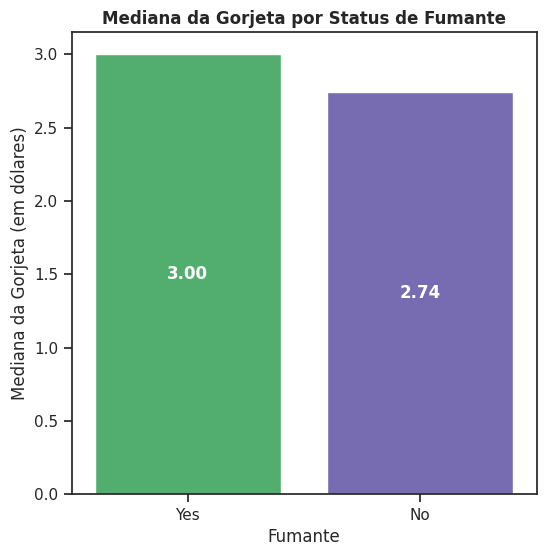

In [150]:
# Calculando a mediana da variável 'tip' por 'smoker'
median_tips_by_smoker = df.groupby('smoker')['tip'].median()
median_tips_by_smoker = median_tips_by_smoker.reindex(['Yes', 'No'])

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=median_tips_by_smoker.index, y=median_tips_by_smoker.values, palette=colors)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center', color='white', weight='bold')

plt.title('Mediana da Gorjeta por Status de Fumante', weight='bold')
plt.xlabel('Fumante')
plt.ylabel('Mediana da Gorjeta (em dólares)')
plt.show()

In [108]:
# Calculando o percentual de gorjetas recebidas por fumantes em relação a não fumantes
smoker_to_non_smoker_percentage = ((median_tips_by_smoker['Yes'] / median_tips_by_smoker['No']) * 100) - 100

display(Markdown(
    "<br>"
    f"Os clientes fumantes pagam `{smoker_to_non_smoker_percentage:.2f}%` "
    "de gorjeta a mais que clientes não fumantes."
))

<br>Os clientes fumantes pagam `9.49%` de gorjeta a mais que clientes não fumantes.

* O valor da gorjeta paga por clientes fumantes é cerca de **9.49%** acima do valor das gorjetas pagas por clientes não fumantes;
* Apesar do valor da gorjeta recebida por clientes fumantes ser sutilmente maior, se comparado aos não fumantes, não chega a ser expressivo a ponto de ser um fator determinante no valor da gorjeta.
---

<div id='pergunta_05'><h3>3.5. O horário das refeições influencia no valor das gorjetas? Se sim, qual o horário mais frequente?</h3></div>

>***Hipótese:*** *A distribuição das gorjetas pode variar dependendo se a refeição é feita no almoço ou jantar.*

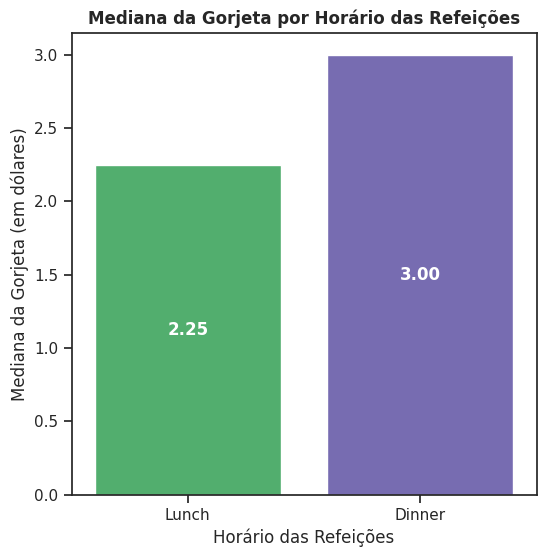

In [151]:
# Calculando a mediana da variável 'tip' por 'time'
median_tips_by_time = df.groupby('time')['tip'].median().sort_values()

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=median_tips_by_time.index, y=median_tips_by_time.values)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center', color='white', weight='bold')

plt.title('Mediana da Gorjeta por Horário das Refeições', weight='bold')
plt.xlabel('Horário das Refeições')
plt.ylabel('Mediana da Gorjeta (em dólares)')
plt.show()

In [102]:
# Calculando o percentual de gorjetas recebidas no horário do almoço em relação ao jantar
dinner_to_lunch_percentage = ((median_tips_by_time['Dinner'] / median_tips_by_time['Lunch']*100)-100)

display(Markdown(
    "<br>"
    "No horário do jantar (dinner) o valor da gorjeta é "
    f"`{dinner_to_lunch_percentage:.2f}%` maior do que no horário do almoço (lunch)."    
))

<br>No horário do jantar (dinner) o valor da gorjeta é `33.33%` maior do que no horário do almoço (lunch).

* Há uma diferença nos valores de gorjeta pagas por clientes no período do jantar e almoço. O valor da gorjeta paga no período do jantar é cerca de **33,33%** maior do que no almoço.
* Logo, conclui-se que o horário do jantar é um fator que influencia no aumento do valor da gorjeta.

---

<div id='pergunta_06'><h3>3.6. Qual a correlação entre a gorjeta e as demais variáveis quantitativas?</h3></div>

>***Hipótese:*** *Para além do valor total da conta, é possível que haja uma correlação entre a gorjeta e as demais variáveis quantitativas.*

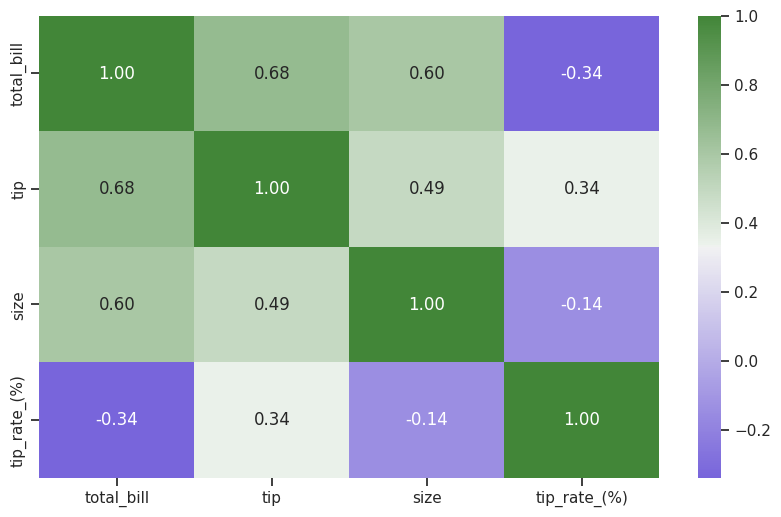

In [104]:
# Criando um gráfico de calor (heatmap) das variáveis quantitativas
quantitative_df = df.select_dtypes(include=[float, int])
corr = quantitative_df.corr(method='pearson')
cmap = sns.diverging_palette(270, 125, as_cmap=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap=cmap)
plt.show()

* Há uma **alta correlação** entre o **total da conta (total_bill)**, a **gorjeta** e a **quantidade de pessoas na mesa**.
---

<div id='pergunta_07'><h3>3.7. Qual a influência da quantidade de pessoas na mesa no total da conta e valor da gorjeta? E qual a distribuição ao longo dos dias da semana?</h3></div>

>***Hipótese:*** *O valor da conta pode aumentar dependendo do tamanho do grupo. Grupos maiores tendem a gastar mais, principalmente nos fins de semana.*

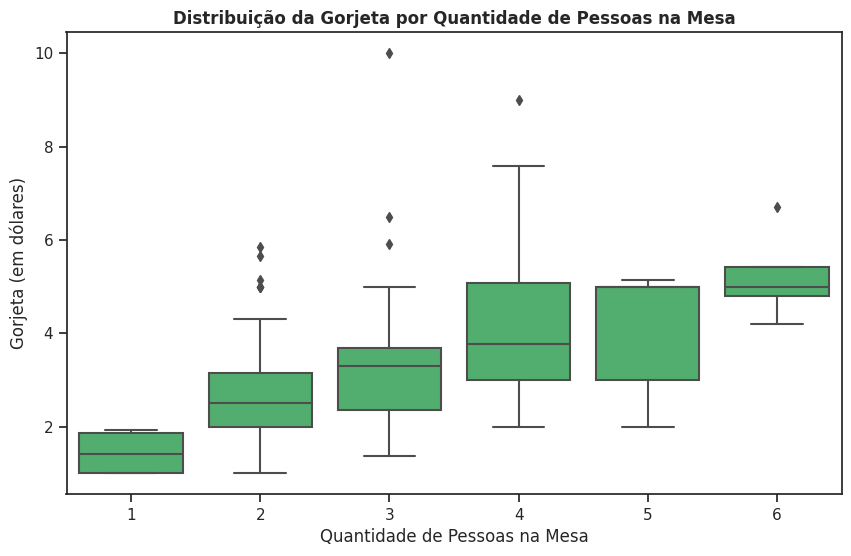

In [158]:
# Criando um gráfico de dispersão da variável 'tip' por 'size'
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='size', y='tip', data=df, color=colors[0])

plt.title('Distribuição da Gorjeta por Quantidade de Pessoas na Mesa', weight='bold')
plt.xlabel('Quantidade de Pessoas na Mesa')
plt.ylabel('Gorjeta (em dólares)')
plt.show()

* Analisando o gráfico acima, é possível observar a relação crescente do valor da gorjeta com a quantidade de pessoas na mesa;
* A partir de três pessoas na mesa, cresce a assimetria dos dados e a presença de valores discrepantes (outliers).
---

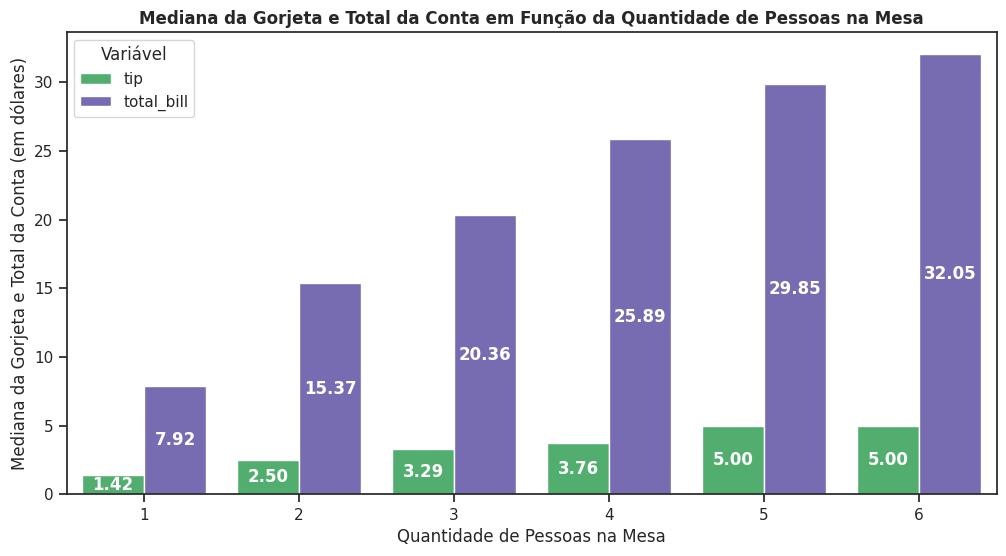

In [157]:
# Criando um gráfico de barras para comparar as variáveis 'tip' e 'total_bill' por 'size'
median_values_by_size = df.groupby('size').agg({'tip': 'median', 'total_bill': 'median'}).reset_index()
median_values_by_size_long = pd.melt(median_values_by_size, id_vars='size', var_name='variable', value_name='mean_value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=median_values_by_size_long, x='size', y='mean_value', hue='variable', palette=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', weight='bold')

plt.title('Mediana da Gorjeta e Total da Conta em Função da Quantidade de Pessoas na Mesa', weight='bold')
plt.xlabel('Quantidade de Pessoas na Mesa')
plt.ylabel('Mediana da Gorjeta e Total da Conta (em dólares)')
plt.legend(title='Variável')
plt.show()

* O gráfico acima demonstra a mediana dos valores da gorjeta e total da conta pela quantidade de pessoas na mesa, sendo visível a tendência de crescimento tanto do valor total da conta, quanto do valor da gorjeta, alcançando o **dobro dos valores**, quando comparadas as mesas com **2 e 5 pessoas**;
* Com 6 pessoas na mesa, a mediana do valor total da conta é de **32.05 dólares** e a gorjeta de **5.00 dólares**, sendo acima dos valores médios, representanto valores discrepantes (outliers).

---

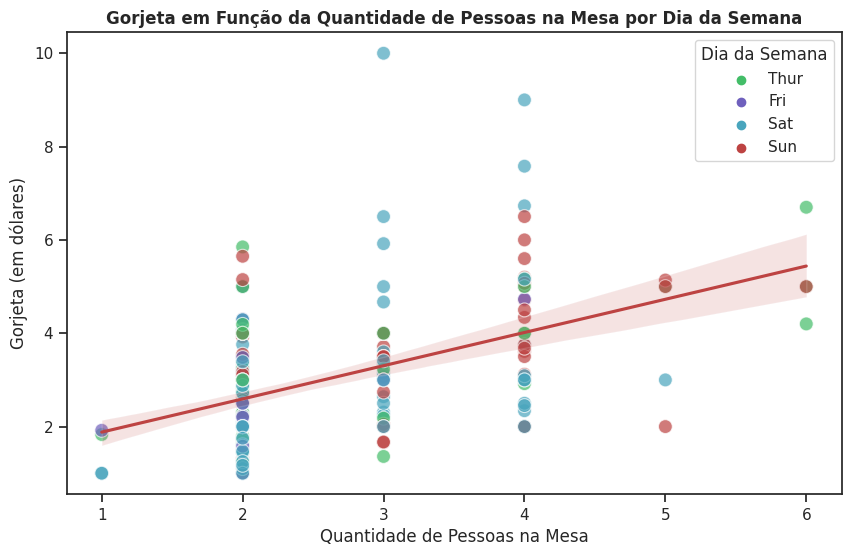

In [154]:
# Criando gráfico de dispersão com linha de regressão das variáveis 'tip' e 'size' por 'day'
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='size', y='tip', hue='day', s=100, alpha=0.7)
sns.regplot(data=df, x='size', y='tip', scatter=False, color=colors[3], ax=ax)

plt.title('Gorjeta em Função da Quantidade de Pessoas na Mesa por Dia da Semana', weight='bold')
plt.xlabel('Quantidade de Pessoas na Mesa')
plt.ylabel('Gorjeta (em dólares)')
plt.legend(title='Dia da Semana')
plt.show()

Relacionando os dados de valor da gorjeta e quantidade de pessoas na mesa pelos dias da semana, verifica-se que a maior concentração de dados de gorjetas se dá em mesas de **2 a 4 pessoas** aos sábados e domingos. Abaixo ou acima dessa quantidade, são valores pontuais em mesas com 5 pessoas aos sábados e domingos; e 6 pessoas às quintas e domingos. 

<div id='principais_insights'><h3>3.8. Principais Insights</h3></div> 

A partir das análise e visualizações criadas, é possível inferir que:

* Há uma **alta correlação** entre o **valor total da conta** e a **gorjeta**, com uma maior concentração entre **10 e 30 dólares**, porém com presença de valores discrepantes (outliers);
* Maior presença de outliers na variável `tip` a medida que o valor da conta ultrapassa o valor de **30 dólares**;
* A taxa da gorjeta ou `tip_rate_(%)` representa uma média de **16%** do valor total da conta, sendo que em **75%** dos valores registrados, a taxa da gorjeta representa **19,15%**;
* O valor das gorjetas têm pouca variação ao longo dos dias registrados, com um sutil aumento no fim de semana, entre **sexta (Friday)** e **domingo (Sunday)**. Acerca do valor total da conta, há um acentuado aumento no fim de semana, principalmente entre **sábado (Saturday)** e **domingo (Sunday)**;
* O valor da gorjeta paga por clientes do sexo masculino é cerca de **9.09%** acima do valor pago por clientes do sexo feminino, porém o valor não chega a ser tão expressivo a ponto de ser um fator determinante no valor da gorjeta;
* O valor da gorjeta paga por clientes fumantes é cerca de **9.49%** acima do valor das gorjetas pagas por clientes não fumantes, porém o valor não chega a ser tão expressivo a ponto de ser um fator determinante no valor da gorjeta;
* Há uma diferença nos valores de gorjeta pagas por clientes no período do jantar e almoço. O valor da gorjeta paga no período do jantar é cerca de **33,33%** maior do que no almoço;
* A partir de **três pessoas na mesa**, os dados tendem a ser mais assimétricos e a apresentar valores discrepantes (outliers);
* Há uma relação proporcional entre a quantidade de pessoas na mesa e o aumento da gorjeta, chegando ao **dobro do valor**, quando comparadas as mesas com 2 e 5 pessoas;
* A maior concentração de dados de gorjetas se dá em mesas de **2 a 4 pessoas** aos sábados e domingos;
* Alta correlação entre o **valor da conta**, a **quantidade de pessoas na mesa** e a **gorjeta**.